📖 Loading dataset from: D:\科研\Models\drugreflector\processed_data\training_data_lincs2020_chemfiltered_1201_l.pkl
   ✓ Loaded: 509,006 samples

📊 Generating visualization...
   Samples: 509,006
   Compounds: 10,107
   Cell Lines: 57
   Genes: 978

✅ Visualization saved to: D:\科研\Models\drugreflector\visualizations\dataset_overview_report.png
   Resolution: 300 DPI
   Size: 16.0 x 11.0 inches


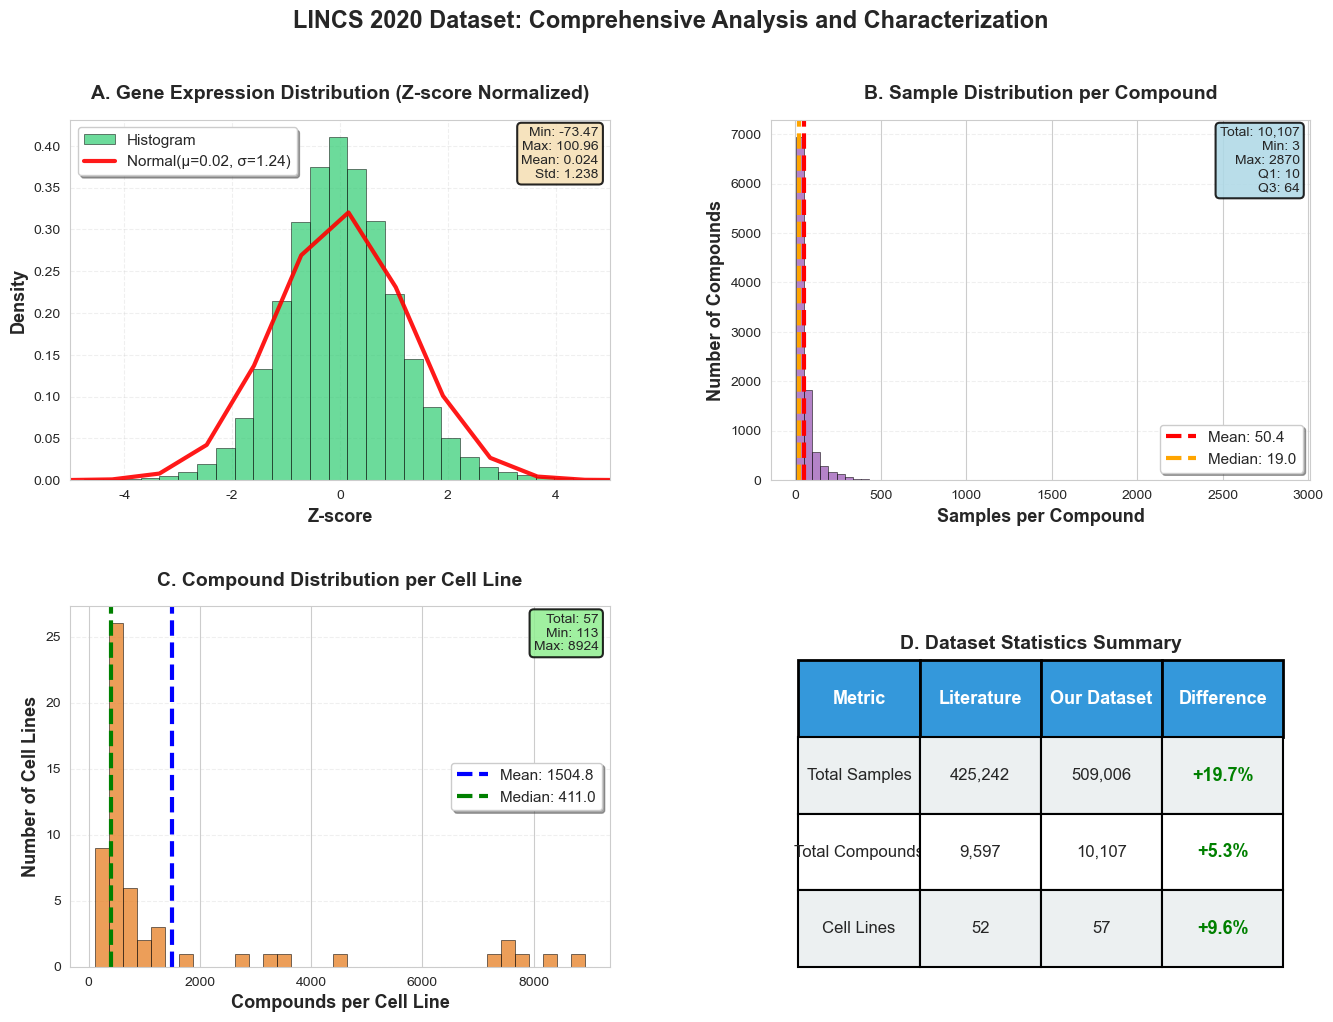


📊 ADDITIONAL STATISTICS FOR REPORT

1. Data Quality Metrics:
   • Missing values: 0 (0.0000%)
   • Infinite values: 0
   • Z-score range: [-101.17, 101.17]

2. Compound Coverage:
   • Compounds with >100 samples: 1,291
   • Compounds with >50 samples: 3,163
   • Compounds with <10 samples: 2,011

3. Cell Line Distribution:
   Top 5 cell lines:
      • MCF7: 61,483 samples (12.1%)
      • PC3: 60,601 samples (11.9%)
      • VCAP: 49,884 samples (9.8%)
      • A549: 47,318 samples (9.3%)
      • A375: 44,753 samples (8.8%)

4. Expression Statistics:
   • Mean Z-score: 0.0261
   • Std Z-score: 1.2398
   • Median Z-score: 0.0000
   • 95th percentile: 1.8069
   • 5th percentile: -1.6664


✅ All done! Use the figure in your rotation report.


In [8]:
"""
LINCS 2020 Dataset Visualization for Rotation Report
生成用于轮转报告的数据集可视化图表
"""

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体和样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

def load_data(data_path):
    """加载数据集"""
    print(f"📖 Loading dataset from: {data_path}")
    with open(data_path, 'rb') as f:
        data = pickle.load(f)
    print(f"   ✓ Loaded: {len(data['X']):,} samples")
    return data

def create_comprehensive_visualization(data, output_path="dataset_overview.png"):
    """
    创建综合数据集可视化
    包含4个子图：
    1. Z-score分布
    2. 每个化合物的样本数分布
    3. 每个细胞系的化合物数分布
    4. 数据集统计摘要表格
    """
    
    # 提取关键信息
    X = data['X']
    metadata = data['sample_meta']
    n_samples, n_genes = X.shape
    n_compounds = metadata['pert_id'].nunique()
    n_cells = metadata['cell_iname'].nunique() if 'cell_iname' in metadata.columns else 'N/A'
    
    print(f"\n📊 Generating visualization...")
    print(f"   Samples: {n_samples:,}")
    print(f"   Compounds: {n_compounds:,}")
    print(f"   Cell Lines: {n_cells}")
    print(f"   Genes: {n_genes}")
    
    # 创建画布：2行2列布局
    fig = plt.figure(figsize=(16, 11))
    gs = GridSpec(2, 2, figure=fig, hspace=0.35, wspace=0.3)
    
    # ============ 子图1: Z-score分布 (左上) ============
    ax1 = fig.add_subplot(gs[0, 0])
    
    # 采样以加快绘制
    sample_size = min(50000, len(X))
    sample_indices = np.random.choice(len(X), sample_size, replace=False)
    X_sample = X[sample_indices].flatten()
    
    # 绘制直方图和KDE（更细的bins）
    ax1.hist(X_sample, bins=500, density=True, alpha=0.7, color='#2ecc71', 
            edgecolor='black', linewidth=0.5, label='Histogram')
    
    # 添加理论正态分布曲线
    mu, sigma = X_sample.mean(), X_sample.std()
    x_range = np.linspace(X_sample.min(), X_sample.max(), 200)
    from scipy.stats import norm
    ax1.plot(x_range, norm.pdf(x_range, mu, sigma), 'r-', linewidth=3, 
            label=f'Normal(μ={mu:.2f}, σ={sigma:.2f})', alpha=0.9)
    
    ax1.set_xlabel('Z-score', fontsize=13, fontweight='bold')
    ax1.set_ylabel('Density', fontsize=13, fontweight='bold')
    ax1.set_title('A. Gene Expression Distribution (Z-score Normalized)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax1.legend(fontsize=11, frameon=True, shadow=True, loc='upper left')
    ax1.grid(alpha=0.3, linestyle='--')
    ax1.set_xlim(-5, 5)
    
    # 添加统计信息文本框
    stats_text = f'Min: {X_sample.min():.2f}\nMax: {X_sample.max():.2f}\n' \
                 f'Mean: {mu:.3f}\nStd: {sigma:.3f}'
    ax1.text(0.98, 0.98, stats_text, transform=ax1.transAxes, 
            fontsize=10, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.85, 
                     edgecolor='black', linewidth=1.5))
    
    # ============ 子图2: 每个化合物的样本数分布 (右上) ============
    ax2 = fig.add_subplot(gs[0, 1])
    
    samples_per_compound = metadata.groupby('pert_id').size().values
    
    # 更细的bins
    ax2.hist(samples_per_compound, bins=60, color='#9b59b6', alpha=0.75, 
            edgecolor='black', linewidth=0.5)
    ax2.axvline(samples_per_compound.mean(), color='red', linestyle='--', 
               linewidth=3, label=f'Mean: {samples_per_compound.mean():.1f}')
    ax2.axvline(np.median(samples_per_compound), color='orange', linestyle='--', 
               linewidth=3, label=f'Median: {np.median(samples_per_compound):.1f}')
    
    ax2.set_xlabel('Samples per Compound', fontsize=13, fontweight='bold')
    ax2.set_ylabel('Number of Compounds', fontsize=13, fontweight='bold')
    ax2.set_title('B. Sample Distribution per Compound', 
                  fontsize=14, fontweight='bold', pad=15)
    ax2.legend(fontsize=11, frameon=True, shadow=True)
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    
    # 添加统计信息
    stats_text = f'Total: {len(samples_per_compound):,}\n' \
                 f'Min: {samples_per_compound.min()}\n' \
                 f'Max: {samples_per_compound.max()}\n' \
                 f'Q1: {np.percentile(samples_per_compound, 25):.0f}\n' \
                 f'Q3: {np.percentile(samples_per_compound, 75):.0f}'
    ax2.text(0.98, 0.98, stats_text, transform=ax2.transAxes, 
            fontsize=10, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.85,
                     edgecolor='black', linewidth=1.5))
    
    # ============ 子图3: 每个细胞系的化合物数分布 (左下) ============
    ax3 = fig.add_subplot(gs[1, 0])
    
    if 'cell_iname' in metadata.columns:
        compounds_per_cell = metadata.groupby('cell_iname')['pert_id'].nunique().values
        
        # 更细的bins
        ax3.hist(compounds_per_cell, bins=35, color='#e67e22', alpha=0.75, 
                edgecolor='black', linewidth=0.5)
        ax3.axvline(compounds_per_cell.mean(), color='blue', linestyle='--', 
                   linewidth=3, label=f'Mean: {compounds_per_cell.mean():.1f}')
        ax3.axvline(np.median(compounds_per_cell), color='green', linestyle='--', 
                   linewidth=3, label=f'Median: {np.median(compounds_per_cell):.1f}')
        
        ax3.set_xlabel('Compounds per Cell Line', fontsize=13, fontweight='bold')
        ax3.set_ylabel('Number of Cell Lines', fontsize=13, fontweight='bold')
        ax3.set_title('C. Compound Distribution per Cell Line', 
                      fontsize=14, fontweight='bold', pad=15)
        ax3.legend(fontsize=11, frameon=True, shadow=True)
        ax3.grid(axis='y', alpha=0.3, linestyle='--')
        
        # 添加统计信息
        stats_text = f'Total: {len(compounds_per_cell)}\n' \
                     f'Min: {compounds_per_cell.min()}\n' \
                     f'Max: {compounds_per_cell.max()}'
        ax3.text(0.98, 0.98, stats_text, transform=ax3.transAxes, 
                fontsize=10, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.85,
                         edgecolor='black', linewidth=1.5))
    else:
        ax3.text(0.5, 0.5, 'Cell line information not available', 
                ha='center', va='center', fontsize=12, transform=ax3.transAxes)
    
    # ============ 子图4: 数据集统计摘要表格 (右下) ============
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.axis('off')
    
    # 创建统计表格数据（只保留前3行）
    table_data = [
        ['Metric', 'Literature', 'Our Dataset', 'Difference'],
        ['Total Samples', '425,242', f'{n_samples:,}', f'+{(n_samples-425242)/425242*100:.1f}%'],
        ['Total Compounds', '9,597', f'{n_compounds:,}', f'+{(n_compounds-9597)/9597*100:.1f}%'],
        ['Cell Lines', '52', f'{n_cells}', f'+{((n_cells if isinstance(n_cells, int) else 57)-52)/52*100:.1f}%' if isinstance(n_cells, int) else '+9.6%'],
    ]
    
    # 绘制表格（调整bbox避免与标题重叠）
    table = ax4.table(cellText=table_data, cellLoc='center', loc='center',
                     bbox=[0.05, 0.0, 0.9, 0.85])  # [left, bottom, width, height]
    
    # 美化表格
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 4)
    
    # 设置表头样式
    for i in range(4):
        cell = table[(0, i)]
        cell.set_facecolor('#3498db')
        cell.set_text_props(weight='bold', color='white', fontsize=13)
        cell.set_edgecolor('black')
        cell.set_linewidth(2)
    
    # 设置数据行样式（交替颜色）
    for i in range(1, len(table_data)):
        for j in range(4):
            cell = table[(i, j)]
            if i % 2 == 1:
                cell.set_facecolor('#ecf0f1')
            else:
                cell.set_facecolor('white')
            
            cell.set_edgecolor('black')
            cell.set_linewidth(1.5)
            
            # 高亮差异列（如果是正数用绿色）
            if j == 3 and i > 0:
                text = table_data[i][j]
                if '+' in text and '%' in text:
                    cell.set_text_props(color='green', weight='bold', fontsize=13)
                elif '-' in text and '%' in text:
                    cell.set_text_props(color='red', weight='bold', fontsize=13)
                else:
                    cell.set_text_props(fontsize=12)
            else:
                cell.set_text_props(fontsize=12)
    
    # 表格标题（调整位置避免重叠）
    ax4.text(0.5, 0.92, 'D. Dataset Statistics Summary', 
            transform=ax4.transAxes,
            fontsize=14, fontweight='bold', 
            ha='center', va='top')
    
    # ============ 添加整体标题 ============
    fig.suptitle('LINCS 2020 Dataset: Comprehensive Analysis and Characterization', 
                 fontsize=17, fontweight='bold', y=0.98)
    
    # 保存图片
    plt.savefig(output_path, dpi=300, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    print(f"\n✅ Visualization saved to: {output_path}")
    print(f"   Resolution: 300 DPI")
    print(f"   Size: {fig.get_size_inches()[0]:.1f} x {fig.get_size_inches()[1]:.1f} inches")
    
    plt.show()

def generate_additional_stats(data):
    """生成额外的统计信息（用于报告文本）"""
    print(f"\n{'='*60}")
    print(f"📊 ADDITIONAL STATISTICS FOR REPORT")
    print(f"{'='*60}")
    
    metadata = data['sample_meta']
    X = data['X']
    
    # 1. 数据质量指标
    print(f"\n1. Data Quality Metrics:")
    print(f"   • Missing values: {np.isnan(X).sum():,} ({np.isnan(X).sum()/(X.size)*100:.4f}%)")
    print(f"   • Infinite values: {np.isinf(X).sum():,}")
    print(f"   • Z-score range: [{X.min():.2f}, {X.max():.2f}]")
    
    # 2. 化合物覆盖率
    print(f"\n2. Compound Coverage:")
    samples_per_compound = metadata.groupby('pert_id').size()
    print(f"   • Compounds with >100 samples: {(samples_per_compound > 100).sum():,}")
    print(f"   • Compounds with >50 samples: {(samples_per_compound > 50).sum():,}")
    print(f"   • Compounds with <10 samples: {(samples_per_compound < 10).sum():,}")
    
    # 3. 细胞系分布
    if 'cell_iname' in metadata.columns:
        print(f"\n3. Cell Line Distribution:")
        top_cells = metadata['cell_iname'].value_counts().head(5)
        print(f"   Top 5 cell lines:")
        for cell, count in top_cells.items():
            print(f"      • {cell}: {count:,} samples ({count/len(metadata)*100:.1f}%)")
    
    # 4. 表达量统计
    print(f"\n4. Expression Statistics:")
    print(f"   • Mean Z-score: {X.mean():.4f}")
    print(f"   • Std Z-score: {X.std():.4f}")
    print(f"   • Median Z-score: {np.median(X):.4f}")
    print(f"   • 95th percentile: {np.percentile(X, 95):.4f}")
    print(f"   • 5th percentile: {np.percentile(X, 5):.4f}")
    
    print(f"\n{'='*60}\n")

def main():
    """主函数"""
    # 配置路径
    data_path = r"D:\科研\Models\drugreflector\processed_data\training_data_lincs2020_chemfiltered_1201_l.pkl"
    output_path = r"D:\科研\Models\drugreflector\visualizations\dataset_overview_report.png"
    
    # 创建输出目录
    Path(output_path).parent.mkdir(parents=True, exist_ok=True)
    
    # 加载数据
    data = load_data(data_path)
    
    # 生成可视化
    create_comprehensive_visualization(data, output_path)
    
    # 生成额外统计信息
    generate_additional_stats(data)
    
    print(f"✅ All done! Use the figure in your rotation report.")

if __name__ == "__main__":
    main()

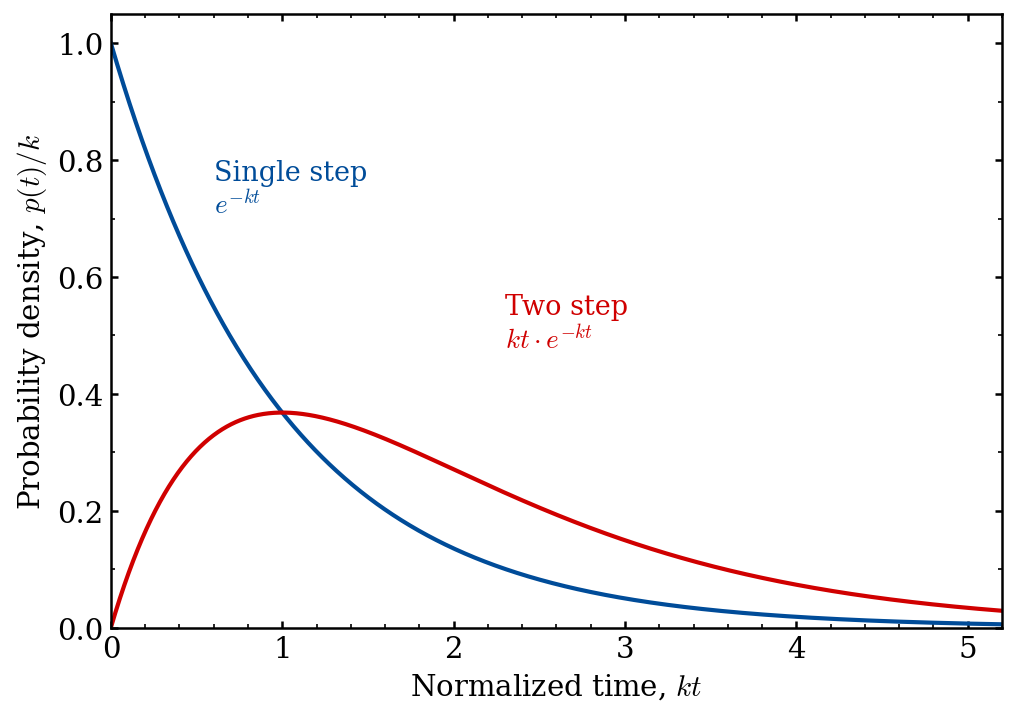

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# --- 1. 全局样式设置 (符合科研出版标准) ---
# 使用字典更新 rcParams，确保字体、线宽等统一
plt.rcParams.update({
    'font.family': 'serif',          # 衬线体 (Times New Roman 风格)
    'font.size': 14,                 # 全局字号
    'mathtext.fontset': 'cm',        # 数学公式字体 (Computer Modern)
    'axes.linewidth': 1.2,           # 坐标轴边框加粗
    'xtick.major.width': 1.2,        # 主刻度线加粗
    'ytick.major.width': 1.2,
    'xtick.minor.width': 0.8,        # 次刻度线适度
    'ytick.minor.width': 0.8,
    'xtick.direction': 'in',         # 刻度向内
    'ytick.direction': 'in',
    'lines.linewidth': 2.0,          # 曲线宽度
    'figure.dpi': 150                # 预览分辨率
})

# --- 2. 数据准备 ---
t = np.linspace(0, 5.2, 1000)
# 归一化公式
p_single = np.exp(-t)
p_two = t * np.exp(-t)

# --- 3. 创建图表 ---
fig, ax = plt.subplots(figsize=(7, 5)) # 7x5 英寸是常见的单栏/半页尺寸

# --- 4. 绘制曲线 ---
# 颜色选择：高对比度、适合黑白打印区分的深色系
# 蓝色 (#004C99) 代表 Single step
ax.plot(t, p_single, color='#004C99', label='Single step')
# 红色 (#D00000) 代表 Two step
ax.plot(t, p_two, color='#D00000', label='Two step')

# --- 5. 坐标轴调整 ---
ax.set_xlim(0, 5.2)
ax.set_ylim(0, 1.05)

# 主刻度与次刻度
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# 开启顶部和右侧刻度 (Top & Right Ticks)
ax.tick_params(top=True, right=True, which='both')

# --- 6. 标签与文本 (LaTeX 格式) ---
# 轴标签：使用标准的物理量符号
ax.set_xlabel(r'Normalized time, $kt$') 
ax.set_ylabel(r'Probability density, $p(t)/k$')

# 曲线内标注 (Direct Labeling)
# 相比图例，直接标注在曲线旁通常更易读
# 1. Single Step 标注
ax.text(0.6, 0.75, 
        r'Single step' + '\n' + r'$e^{-kt}$', # 粗体文本 + 公式
        color='#004C99', fontsize=13, ha='left', va='center')

# 2. Two Step 标注
ax.text(2.3, 0.52, 
        r'Two step' + '\n' + r'$kt \cdot e^{-kt}$', 
        color='#D00000', fontsize=13, ha='left', va='center')

# --- 7. 输出与显示 ---
plt.tight_layout()
# 保存为高分辨率 (300 dpi 是出版底线，600 更佳)
# plt.savefig('figure_publication_ready.png', dpi=300, bbox_inches='tight')
# plt.savefig('figure_publication_ready.pdf', format='pdf') # 矢量图最佳
plt.show()